# Mushroom Toxicity Classification Technical Report 

Mo and Tom


## 1. Introduction

Malia and Tommy chose to do research on a mushroom dataset. Malia and Tommy used classifiers KNN, and Naive Bayes, random forrest You will see below that ______ performed the best.



with an accuracy of _______ and recall of ____________, correctly classifiying _________ instances of the testing data.

In [1]:
import importlib

import mysklearn.mypytable as mypytable
importlib.reload(mypytable)
from mysklearn.mypytable import MyPyTable

import mysklearn.myknnclassifier
importlib.reload(mysklearn.myknnclassifier)
from mysklearn.myknnclassifier import MyKNeighborsClassifier

import mysklearn.mynaivebayesclassifier
importlib.reload(mysklearn.mynaivebayesclassifier)
from mysklearn.mynaivebayesclassifier import MyNaiveBayesClassifier

import mysklearn.myeval
importlib.reload(mysklearn.myeval)
import mysklearn.myeval as myeval



import utils
importlib.reload(utils)
import utils as utils

mush_data = MyPyTable()
mush_data.load_from_file('/home/CPSC322finalProject/input_data/new_mushroom_cleaned.csv')

## 2. DATA ANALYSIS

The research that Malia and Tommy did was classifiying mushrooms as either edible or non-edible. The orginal dataset was 50000 and some noise instances and they pruned it down to approxomatly 1000 of each edible and non-edible. The dataset had attributtes: cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season, and finaly class. The starting data was farily clean to begin with, but they had to give numeric values to seasons of the year. When conducting their research the pair used season, cap-shape, gill-attachment to classify their mushrooms.

## relevant summary stats goes here

x values: [1.0, 2.0, 3.0, 4.0] y values: [2219, 20387, 27210, 4219]


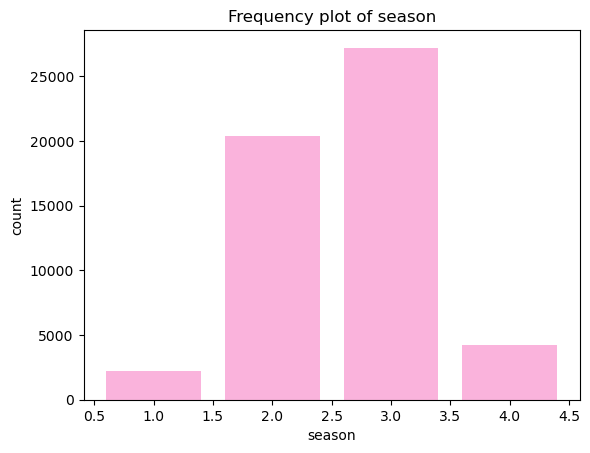

In [2]:
utils.freq_plot(mush_data.data, mush_data.column_names, "season")

caption for graph #1

x values: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0] y values: [5273, 1722, 12294, 2780, 1700, 6889, 23377]


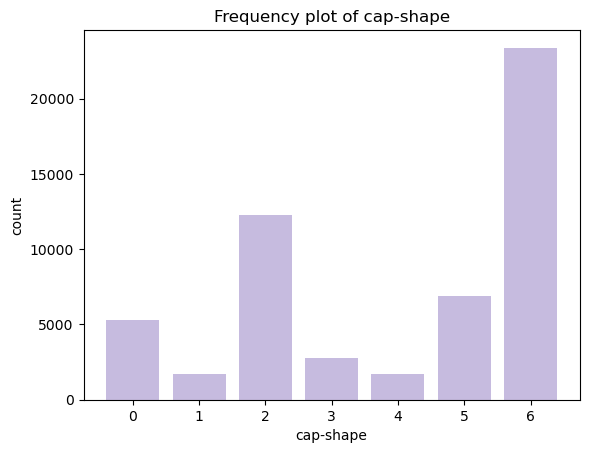

In [3]:
utils.freq_plot(mush_data.data, mush_data.column_names, "cap-shape")

caption for graph #2

x values: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0] y values: [19405, 10026, 4474, 3042, 4795, 5292, 7001]


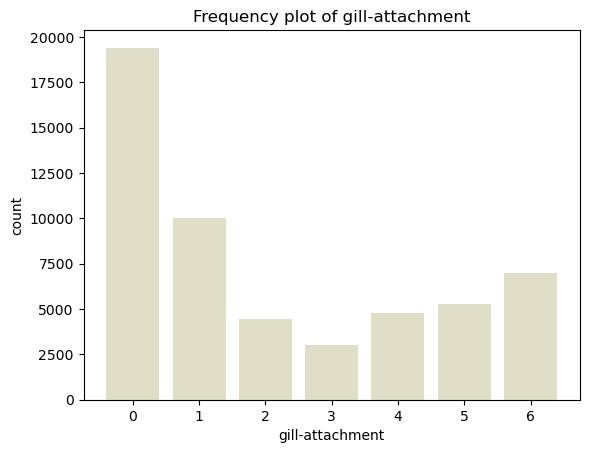

In [4]:
utils.freq_plot(mush_data.data, mush_data.column_names, "gill-attachment")

caption for graph #3

x values: [0.0, 1.0] y values: [24360, 29675]


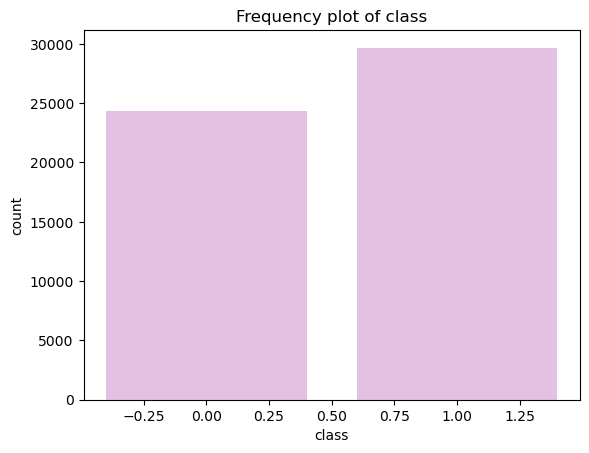

In [5]:
utils.freq_plot(mush_data.data, mush_data.column_names, "class")

caption for graph #4

## MODIFYING DATASET TO BE MORE MANAGABLE

We modified the size of the dataset so that calculations are less computationaly taxing

In [6]:
# train test split and data set shrink
indexes_to_remove = utils.rand_inds(50000, 54034)
mush_data.drop_rows(indexes_to_remove)


#print(len(mush_data.data))

df_mush = []
for i, row in enumerate(mush_data.data):
    df_mush.append(row)

print(len(df_mush))

4035


## NEW GRAPHS

x values: [0.0, 1.0] y values: [1844, 2191]


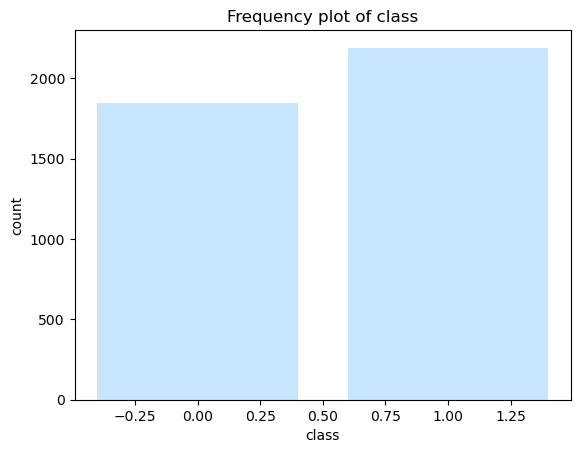

In [8]:
utils.freq_plot(mush_data.data, mush_data.column_names, "class")

x values: [1.0, 2.0, 3.0, 4.0] y values: [177, 1434, 2048, 376]


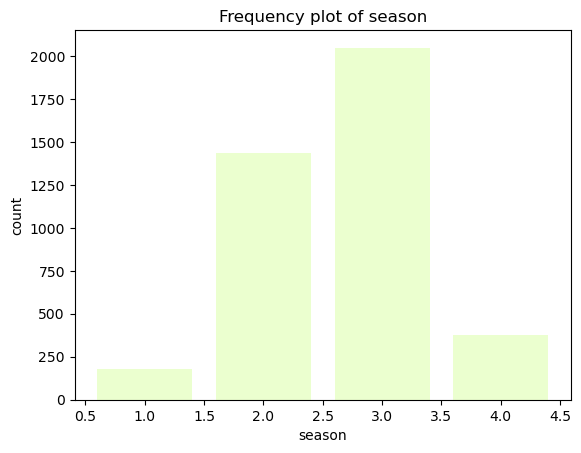

In [9]:
utils.freq_plot(mush_data.data, mush_data.column_names, "season")

## train/test splitting

In [7]:
season = [row[7] for row in df_mush]
stem_width = [row[5] for row in df_mush]
gill_color = [row[3] for row in df_mush]
cap_diameter = [row[0] for row in df_mush]

yummy_or_nah = [row[8] for row in df_mush]

# normalize the data
season_norm = utils.normalize_data(season)
stem_width_norm = utils.normalize_data(stem_width)
gill_color_norm = utils.normalize_data(gill_color)
cap_diameter_norm = utils.normalize_data(cap_diameter)

data_zipped = list(zip(season_norm, stem_width_norm, gill_color_norm, cap_diameter_norm))
X_data = data_zipped

X_train, X_test, y_train, y_test = myeval.train_test_split(X_data, yummy_or_nah, test_size=0.33, random_state=1, shuffle=True)
print(len(y_test))
print(len(X_test))
print(len(X_train))
print(len(y_train))

1332
1332
2703
2703


## Modifiying data

## 3. CLASSIFICATON RESULTS

### KNN

K-Nearest Neighbors (KNN) is a simple algorithm that classifies data points based on the class of their closest neighbors. It compares a new data point to its "k" nearest points in the training set and assigns the most common class among them. It relies on distance metrics like Euclidean distance.

$$ d(p,q) = \sqrt{\sum_{i=1}^{n}(q_i - p_i)^2} $$

kNN also requires normalization of data. Normalizing data involves scaling features to a standard range, often [0, 1], or a distribution with a mean of 0 and standard deviation of 1. This ensures that all features contribute equally to the model and prevents algorithms sensitive to feature scales, like k-nearest neighbors, from being biased toward larger-scale features. It improves the stability and performance of many machine learning models.

$$ Xnormalized = \frac{(x - xmin)}{(xmax - xmin)}

In [15]:
# initiate the knn
knn = MyKNeighborsClassifier(n_neighbors= 5)

knn.fit(X_train, y_train)

knn_y_pred = knn.predict(X_test)

In [16]:
acc = utils.compute_accuracy(knn_y_pred, y_test)
print(f'Accuacy: {acc:.4f}')

recall = utils.compute_recall(knn_y_pred, y_test, positive_label=1)
print(f'Recall: {recall:.4f}')

Accuacy: 0.7988
Recall: 0.8226


### Naive Bayes

$$ P(A|B) = \frac{P(A \cap B)}{P(B)} = \frac{P(B|A)P(A)}{P(B)} $$


Naive Bayes is a probabilistic classifier based on Bayes' theorem, assuming feature independence. It predicts the class with the highest probability given the input features and is efficient for tasks like text classification. Despite its simplicity, it performs well, especially with categorical or discretized data.

In [17]:
y = [row[-1] for row in mush_data.data]   # Labels: survived
k = 10
# Stratified k-fold split
folds = myeval.stratified_kfold_split(X_data, y, n_splits=k, shuffle=True, random_state=2)


In [18]:
# Initialize Naive Bayes classifier
nb_classifier = MyNaiveBayesClassifier()

# List to store the results for each fold
nb_results = []

# Perform cross-validation
for train_indices, test_indices in folds:
    # Split the data into training and testing sets based on the current fold
    X_train = [X_data[i] for i in train_indices]
    y_train = [y[i] for i in train_indices]
    X_test = [X_data[i] for i in test_indices]
    y_test = [y[i] for i in test_indices]

    # Train the Naive Bayes classifier
    nb_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = nb_classifier.predict(X_test)

    # Store the results (true labels and predicted labels)
    nb_results.append((y_test, y_pred))

In [19]:
# Accuracy and Error Rate
nb_accuracy, nb_error_rate = utils.calculate_accuracy_error_rate(nb_results)
# Display the results
print(f"Accuracy:     {nb_accuracy:.4f}")
print(f"Error Rate:   {nb_error_rate:.4f}")

Accuracy:     0.6072
Error Rate:   0.3928


## 5. RANDOM FORREST

## CONCLUSION

## Acknowledgments

In [ ]:
print('mo is an alt girl')